In [21]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

pd.set_option("display.max_columns", None)


# Carregamento dos Dataset

In [22]:
#carregamento dos datasets
market_pop = pd.read_csv('../data/raw/estaticos_market.zip')
portifolio1 = pd.read_csv('../data/raw/estaticos_portfolio1.csv', index_col=False)
portifolio2 = pd.read_csv('../data/raw/estaticos_portfolio2.csv', index_col=False)
portifolio3 = pd.read_csv('../data/raw/estaticos_portfolio3.csv', index_col=False)

In [23]:
#Descarta as correspondência do portifolio no dataset Market
market = market_pop[~market_pop['id'].isin(portifolio1['id'])].reset_index(drop=True)

#A partir do portifolio buscar todas as colunas do dataset Market
portifolio = market_pop[market_pop['id'].isin(portifolio1['id'])].reset_index(drop=True)

# Pre-processamento

## Análise Inicial

In [24]:
market.shape

(461743, 182)

In [25]:
market.info(verbose=True, max_cols=200, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461743 entries, 0 to 461742
Data columns (total 182 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Unnamed: 0                                     461743 non-null  int64  
 1   id                                             461743 non-null  object 
 2   fl_matriz                                      461743 non-null  bool   
 3   de_natureza_juridica                           461743 non-null  object 
 4   sg_uf                                          461743 non-null  object 
 5   natureza_juridica_macro                        461743 non-null  object 
 6   de_ramo                                        461743 non-null  object 
 7   setor                                          459816 non-null  object 
 8   idade_empresa_anos                             461743 non-null  float64
 9   idade_emp_cat                       

In [26]:
market.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,461743.0,2.311474e+05,1.334568e+05,0.000000,115568.500000,231146.000000,3.467225e+05,4.622970e+05
idade_empresa_anos,461743.0,9.948448e+00,9.615641e+00,0.016438,2.756164,6.704110,1.446575e+01,1.064329e+02
vl_total_tancagem,280.0,3.201429e+01,8.128017e+01,1.000000,15.000000,15.000000,3.000000e+01,1.215000e+03
vl_total_veiculos_antt,176.0,3.818182e+00,6.797555e+00,0.000000,1.000000,2.000000,4.000000e+00,5.000000e+01
vl_total_veiculos_leves,30646.0,2.245285e+00,9.578323e+00,0.000000,0.000000,1.000000,2.000000e+00,4.890000e+02
vl_total_veiculos_pesados,30646.0,1.178620e+00,6.592941e+00,0.000000,0.000000,0.000000,1.000000e+00,3.630000e+02
qt_art,6586.0,5.770574e+00,2.545851e+01,1.000000,1.000000,2.000000,4.000000e+00,1.017000e+03
vl_total_veiculos_pesados_grupo,459816.0,3.595097e+00,7.264188e+01,0.000000,0.000000,0.000000,0.000000e+00,9.782000e+03
vl_total_veiculos_leves_grupo,459816.0,4.875730e+01,1.207424e+03,0.000000,0.000000,0.000000,0.000000e+00,1.220900e+05
vl_total_tancagem_grupo,1760.0,1.345972e+02,6.837745e+02,1.000000,15.000000,15.000000,6.625000e+01,1.192200e+04


In [27]:
#Definição da porcentagem de dados faltantes
colunas_nan = (pd.DataFrame(data=[list(market.columns),
                            list(market.isna().sum()),
                            list(round(market.isna().sum()/market.shape[0], 2))]).
               T.rename(columns={0:'atributos', 1: "qtde Nan", 2:'% Nan'}))
colunas_nan

,atributos,qtde Nan,% Nan
0,Unnamed: 0,0,0
1,id,0,0
2,fl_matriz,0,0
3,de_natureza_juridica,0,0
4,sg_uf,0,0
5,natureza_juridica_macro,0,0
6,de_ramo,0,0
7,setor,1927,0
8,idade_empresa_anos,0,0
9,idade_emp_cat,0,0


## Tratamento de dados Faltantes

In [28]:
class DadoFaltantes:
    def __init__ (self, dataset, coluna_excluir):
        self.coluna_excluir = coluna_excluir
        self.dataset = dataset
        self.colunas = sorted(set([index for index,
                                   coluna in enumerate(self.coluna_excluir['% Nan']) if (coluna >= 0.25) | (index == 0)]))
    
    def dropnan_coluna_linha(self):
        dataset_trat = self._imputar_dados_nan()
        #Exclui as colunas com valores faltantes maiores que 25%
        dataset_trat = dataset_trat.drop(columns=dataset_trat.columns[self.colunas])
        
        #Exclusão de colunas baseadas no conhecimento de negócio do Cientista de Dados
        dataset_trat = dataset_trat.drop(columns=['fl_epp', 'fl_email', 'fl_telefone', 'fl_rm', 'fl_spa', 'fl_antt',
                                                  'fl_veiculo', 'vl_total_veiculos_pesados_grupo',
                                                  'vl_total_veiculos_leves_grupo',
                                                  'de_faixa_faturamento_estimado_grupo',
                                                  'vl_faturamento_estimado_grupo_aux', 
                                                  'vl_faturamento_estimado_aux', 'fl_optante_simei',
                                                  'dt_situacao', 'idade_emp_cat', 'sg_uf_matriz',
                                                  'fl_me','fl_sa', 'fl_mei', 'fl_ltda', 'fl_st_especial'])
        
        #Exclusão das linhas que apresentam valores igual OUTROS
        pop_dropColumn_outros = dataset_trat[dataset_trat['de_ramo']=='OUTROS'].index
        dataset_trat = dataset_trat.drop(axis=0, labels=pop_dropColumn_outros)
        return dataset_trat
    

    def _imputar_dados_nan(self):
        imputar_nan = ['de_saude_tributaria', 'de_saude_rescencia', 'nu_meses_rescencia',
                       'de_nivel_atividade', 'nm_meso_regiao', 'nm_micro_regiao', 'de_faixa_faturamento_estimado']
        
        criterio_simples = ['EMPRESARIO INDIVIDUAL',
                            'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA',
                            'EMPRESA INDIVIDUAL IMOBILIARIA',
                            'SOCIEDADE SIMPLES LIMITADA',
                            'SOCIEDADE UNIPESSOAL DE ADVOCACIA',
                            'SOCIEDADE SIMPLES PURA',
                            'EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES',
                            'SOCIEDADE SIMPLES EM COMANDITA SIMPLES',
                            'SOCIEDADE EMPRESARIA EM COMANDITA SIMPLES',
                            'SOCIEDADE SIMPLES EM NOME COLETIVO',
                            'SOCIEDADE EMPRESARIA EM NOME COLETIVO']
        
        for columns in imputar_nan:
            #
            if columns == 'de_saude_tributaria':
                self.dataset[columns] = np.where(self.dataset[columns].isna(),
                                                    'OUTROS',
                                                    self.dataset[columns])

            elif columns == 'de_saude_rescencia':
                self.dataset[columns] = np.where(self.dataset[columns].isna(),
                                                    'SEM INFORMACAO',
                                                    self.dataset[columns])

            elif columns == 'nu_meses_rescencia':
                self.dataset[columns] = np.where(self.dataset['idade_empresa_anos']<1,
                                                    0,
                                                    self.dataset[columns].mean())

            elif columns == 'de_nivel_atividade':
                self.dataset[columns] = self.dataset[columns].fillna('SEM INFORMACAO')
                
            elif columns == 'de_faixa_faturamento_estimado':
                self.dataset[columns] = self.dataset[columns].fillna('SEM INFORMACAO')

            else:
                self.dataset[columns] = self.dataset[columns].fillna("OUTROS")

        self.dataset['fl_optante_simples']= np.where(np.in1d(self.dataset['de_natureza_juridica'], criterio_simples) & 
                                                                (self.dataset['fl_optante_simples'].isna()) &
                                                                (self.dataset['vl_faturamento_estimado_aux']<=480000) &
                                                                (self.dataset['idade_empresa_anos']<5),
                                                                True, False)
        return self.dataset

## Aplicando o LabelEncoder e Normalização

In [29]:
class dimensionamento:
    def __init__(self, dataset):
        self.dataset = dataset
        self.__le = LabelEncoder()
        self.__norm = Normalizer()
        self.__scal = MinMaxScaler()
        self.__stand = StandardScaler()
        
    def __labelEnconder(self):
        for coluna in self.dataset.iloc[:, 1:].select_dtypes(exclude=['float64']).columns:
            self.dataset[coluna] = self.__le.fit_transform(self.dataset[coluna])
        return self.dataset
    
    def __normalizer(self):
        self.dataset.iloc[:, 1:] = self.__norm.fit_transform(self.dataset.iloc[:, 1:])
        return self.dataset
    
    def __scale(self):
        self.dataset.iloc[:, 1:] = self.__scal.fit_transform(self.dataset.iloc[:, 1:])
        return self.dataset
    
    def __stander(self):
        self.dataset.iloc[:, 1:] = self.__stand.fit_transform(self.dataset.iloc[:, 1:])
        return self.dataset
    
    def label_normalizer(self, tipo=None):
        if tipo == 'scale':
            self.dataset = self.__labelEnconder()
            self.dataset = self.__scale()
            return self.dataset
        elif tipo == 'normalizer':
            self.dataset = self.__labelEnconder()
            self.dataset = self.__normalizer()
            return self.dataset
        else:
            self.dataset = self.__labelEnconder()
            self.dataset = self.__stander()
            return self.dataset    

In [30]:
#Aplicando os dados faltantes
market_exclude_port = DadoFaltantes(market, colunas_nan).dropnan_coluna_linha()
df_portifolio = DadoFaltantes(portifolio, colunas_nan).dropnan_coluna_linha()

## Dataset após limpeza de dados faltantes

In [31]:
prof = ProfileReport(market_exclude_port)
prof.to_file(output_file='../reports/figures/profilereport.html')

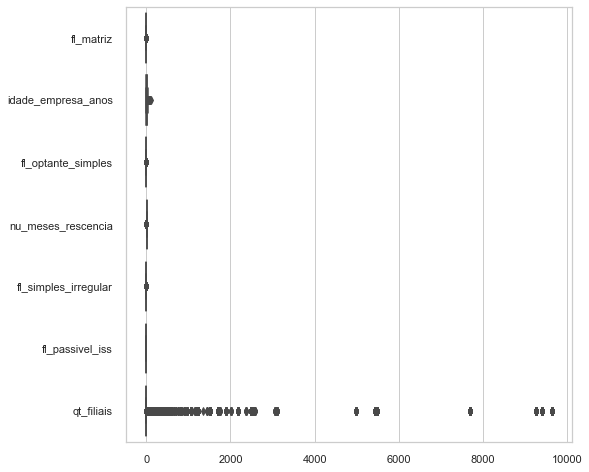

In [32]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize = (8, 8))
sns.boxplot(data=market_exclude_port, orient='h');

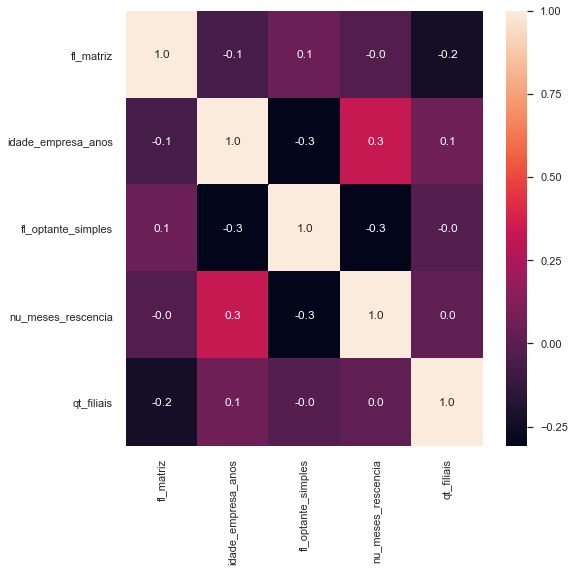

In [33]:
matriz_corr = market_exclude_port.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(matriz_corr, annot=True, fmt='.1f');

## Dataset após Normalização

In [34]:
market_exclude_port = dimensionamento(market_exclude_port).label_normalizer('normalizer')
df_portifolio = dimensionamento(df_portifolio).label_normalizer('normalizer')

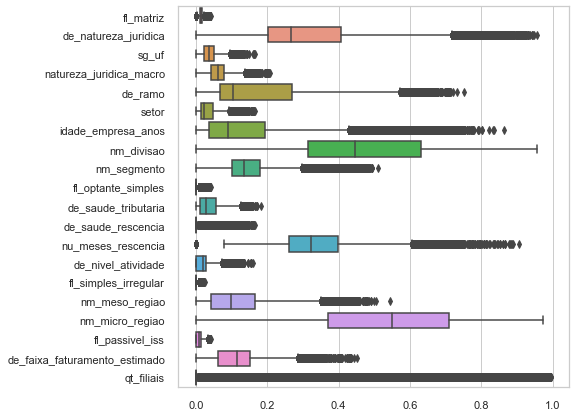

In [35]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize = (7, 7))
sns.boxplot(data=market_exclude_port.iloc[:, 1:], orient='h');

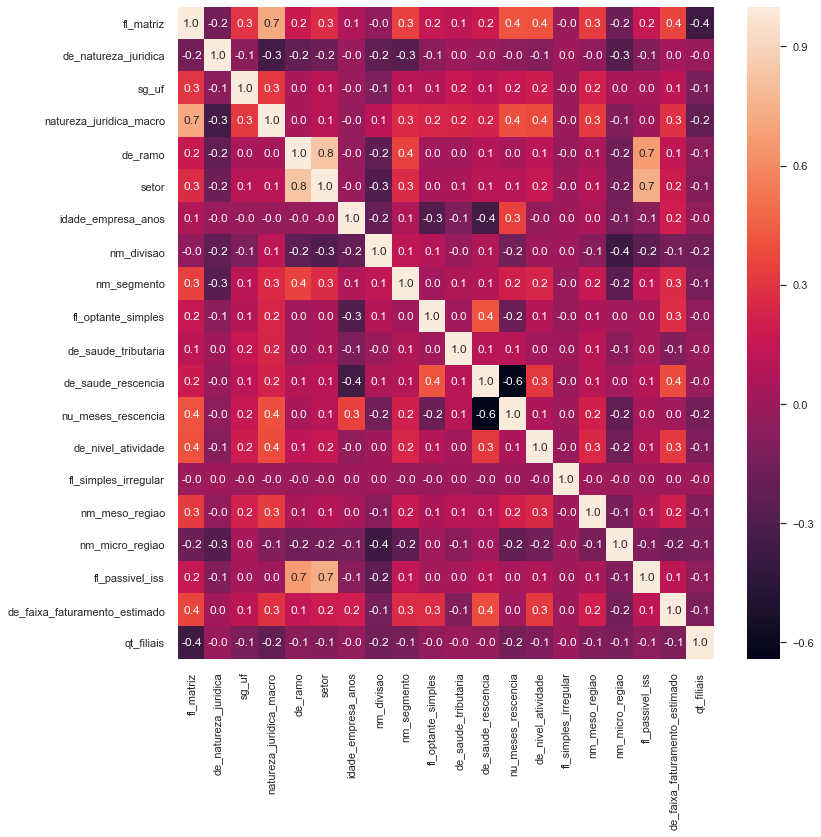

In [36]:
matriz_corr = market_exclude_port.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(matriz_corr, annot=True, fmt='.1f');

In [37]:
prof = ProfileReport(market_exclude_port)
prof.to_file(output_file='../reports/figures/profilereport_posn.html')

# Versão 1 do Projeto - Nearest Neighbors

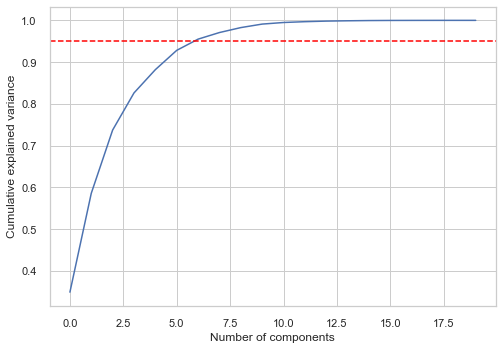

In [38]:
pca = PCA().fit(market_exclude_port.iloc[:, 1:])
evr = pca.explained_variance_ratio_
evr

g = sns.lineplot(np.arange(len(evr)), np.cumsum(evr))
g.axes.axhline(0.95, ls="--", color="red")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [39]:
%%time
#Tratando o Datasat de treino - Market
pca_market_nn = PCA(n_components = 6).fit_transform(market_exclude_port.iloc[:, 1:].values)
pca_portifolio_nn = PCA(n_components =6).fit_transform(df_portifolio.iloc[:, 1:].values)

knn = NearestNeighbors(n_neighbors=3, algorithm='kd_tree')
modelo_v1 = knn.fit(pca_market_nn)

predicao_v1 = modelo_v1.kneighbors(pca_portifolio_nn)

predicao_v1[0].sum()

Wall time: 2.19 s


227.28332119453452

In [40]:
quantidade_empresas = len(set(np.ravel(predicao_v1[1])))
quantidade_empresas

685

# Versão 2 do Projeto - KMeans e KNN

### KMeans

In [41]:
# Coleta uma amostra de 1% dos dados para não comprometer a memória do computador
amostra1, _ = train_test_split(market_exclude_port.iloc[:, 1:], train_size = .1, random_state=41)

In [42]:
%%time
# Aplica redução de dimensionalidade
pca_amostra = PCA(n_components = 6).fit_transform(amostra1.values)
# Determinando um range de K
k_range = range(1,60)

# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters = k).fit(pca_amostra) for k in k_range]

# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

Wall time: 7min 38s


Text(0.5, 1.0, 'Variância Explicada x Valor de K')

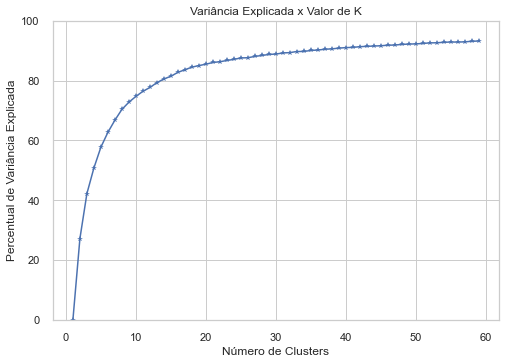

In [43]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca_amostra, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

# Soma total dos quadrados
soma_total = sum(pdist(pca_amostra)**2)/pca_amostra.shape[0]

# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [44]:
%%time
# Criando um modelo com K = 8
modelo_v2 = KMeans(n_clusters = 44)
modelo_v2.fit(pca_amostra)

Wall time: 13.5 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=44, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

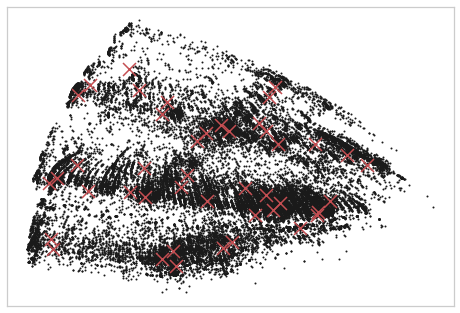

In [45]:
# Plot dos centróides
plt.plot(pca_amostra[:, 0], pca_amostra[:, 1], 'k.', markersize = 4)
centroids = modelo_v2.cluster_centers_
inert = modelo_v2.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xticks(())
plt.yticks(())
plt.show()

In [58]:
for x in range(40, 51):
    modelo_v2 = KMeans(n_clusters = x).fit(pca_amostra)
    labels = modelo_v2.labels_
    silhouette = silhouette_score(pca_amostra, labels, metric = 'euclidean')
    print(f"Número de K: {x} - silhouette: {silhouette}")

Número de K: 40 - silhouette: 0.3609415149541093
Número de K: 41 - silhouette: 0.3705635728501932
Número de K: 42 - silhouette: 0.3556695527155191
Número de K: 43 - silhouette: 0.36162053173300135
Número de K: 44 - silhouette: 0.35589133823954205
Número de K: 45 - silhouette: 0.3577318335005409
Número de K: 46 - silhouette: 0.3673292853498964
Número de K: 47 - silhouette: 0.35657599046188926
Número de K: 48 - silhouette: 0.3646216354528125
Número de K: 49 - silhouette: 0.3662088342123575
Número de K: 50 - silhouette: 0.35665793487727415


In [47]:
%%time
#Predição dos cluster
market_exclude_port = market_exclude_port.reset_index(drop=True)
pca_market_cluster = PCA(n_components = 6).fit_transform(market_exclude_port.iloc[:, 1:].values)
cluster = pd.DataFrame(modelo_v2.predict(pca_market_cluster), columns=['cluster'])

market_exclude_port = pd.concat([market_exclude_port, cluster], axis=1)

Wall time: 2.11 s


In [48]:
len(cluster)

459816

In [49]:
market_exclude_port.shape

(459816, 22)

### KNN

In [50]:
%%time
#Separação entre as variavéis preditoras e target
X = market_exclude_port.iloc[:, 1:-1]
y = market_exclude_port[['cluster']]

X_predit = df_portifolio.iloc[:, 1:]

#Aplicando PCA
pca_v2 = PCA(n_components = 6).fit_transform(X.values)
pca_predit_v2 = PCA(n_components = 6).fit_transform(X_predit.values)

Wall time: 1.62 s


In [51]:
#Separação entre dataset de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(pca_v2, y, test_size = 0.3, random_state = 42)

In [52]:
%%time
#Treinamento
modeloKNN = KNeighborsClassifier(n_neighbors = 3, algorithm='kd_tree')
modeloKNN.fit(X_treino, y_treino)

# Avaliando o modelo e atualizando a lista de acurácias
score = modeloKNN.score(X_teste, y_teste)

predicao_v2 = modeloKNN.kneighbors(pca_predit_v2)
predicao_v2[0].sum()

quantidade_sugestao = len(set(np.ravel(predicao_v2[1])))
quantidade_sugestao

Wall time: 4.4 s


686

## Escolha do modelo

In [53]:
print(f"A soma distâncias computadas para o modelo NN é: {predicao_v1[0].sum()}")
print(f"A soma distâncias computadas para o modelo com clusterização e KNN é: {predicao_v2[0].sum()}")

A soma distâncias computadas para o modelo NN é: 227.28332119453452
A soma distâncias computadas para o modelo com clusterização e KNN é: 232.05298440637074


##  Previsão do modelo Escolhido

In [54]:
#Quantidade única de solução
len(set(np.ravel(predicao_v1[1])))

685

In [55]:
#Indices da empresas prevista como mais aderentes
indice_mais_aderentes = list(set(np.ravel(predicao_v1[1])))

In [56]:
#Empresas recomendadas
empresas_recomendadas = market_exclude_port[market_exclude_port.index.
                                              isin(indice_mais_aderentes)].reset_index(drop=True)

#Retirando as informaçoes das colunas
empresas_recomendadas_toda_info = market_pop[market_pop['id'].
                                             isin(empresas_recomendadas['id'])].reset_index(drop=True)

empresas_recomendadas_toda_info.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,2022,bfa071cbb4d43abc3e6b8116c6c2fa01f8aa9686594162...,True,EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITAD...,MA,OUTROS,COMERCIO E REPARACAO DE VEICULOS,COMERCIO,8.139726,5 a 10,Fal